In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# show more colums
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv("../data/LGA_Flights_Arrival_NoDep.csv")
df.head()

,FlightDate,ArrDelay,Distance,CRSDepTime,CRSElapsedTime,CRSArrTime,DayOfWeek,Year,Month,AverageDelayPerFlightNumber,AverageDelayPerDistanceGroup,AverageDelayPerAircraft,ATL,DTW,LAX,MSY,RDU,IAH,CLT,FLL,BNA,JAX,SLC,SEA,OAK,VPS,LIH,TLH,PHX,RIC,MCO,ORD,ABQ,OGG,MSP,PIT,CID,LIT,RSW,STL,PDX,MEM,ROA,GSP,IAD,BOS,FNT,HSV,MIA,AUS,...,SNA,ICT,KOA,BOI,BIL,SDF,BIS,AVP,SYR,MSN,SAV,MDT,GSO,RNO,EGE,TUL,XNA,COS,FAI,MHT,GPT,STT,STX,TYS,GRB,PHF,CAE,BTR,LFT,MOB,AVL,ABE,AGS,ILM,EVV,ONT,DSM,FCA,CRW,BTV,GNV,HPN,TVC,RAP,PSC,JNU,SBN,GTF,BUR,LGB
0,2018-01-01,-20.0,502.0,517.0,83.0,640,1,2018,1,0.0,0.000000,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,18.0,1076.0,926.0,143.0,1069,1,2018,1,0.0,0.000000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018-01-01,-25.0,950.0,640.0,111.0,791,1,2018,1,0.0,4.250000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018-01-01,36.0,950.0,970.0,116.0,1086,1,2018,1,0.0,1.888889,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018-01-01,-22.0,1096.0,795.0,140.0,975,1,2018,1,0.0,5.461538,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train = df[df["FlightDate"] < "2019-10-01"]
df_test = df[df["FlightDate"] >= "2019-10-01"]

# drop FlightDate
df_train = df_train.drop("FlightDate", axis=1)
df_test = df_test.drop("FlightDate", axis=1)

# drop CRSDepTime
# df_train = df_train.drop("CRSDepTime", axis=1)
# df_test = df_test.drop("CRSDepTime", axis=1)

# Get the arrays
X_train, y_train = df_train.drop("ArrDelay", axis=1), df_train["ArrDelay"]
X_test, y_test = df_test.drop("ArrDelay", axis=1), df_test["ArrDelay"]

# BASELINE

In [19]:
y_pred = np.full(len(y_test), y_train.mean())
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Root Mean squared error: 50.36
Mean absolute error: 28.44
Coefficient of determination: -0.01


# Linear Regression

In [20]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Root Mean squared error: 94029611.03
Mean absolute error: 2965034.41
Coefficient of determination: -3503168532959.10


# Random Forest

In [22]:
# # Create a random forest
# rf = RandomForestRegressor(n_estimators=200, random_state=1601)

# # Train the model using the training sets
# rf.fit(X_train, y_train)

rfc=RandomForestRegressor(random_state=1601)

param_grid = { 
    'n_estimators': range(100, 500, 150),
    'max_features': ['auto', 'sqrt'],
    'max_depth': range (5, 8, 2),
    'criterion' :["squared_error", "absolute_error"]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose=2)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   4.1s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   4.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   4.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   4.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=100; total time=   4.1s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=   9.9s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=  10.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=  10.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=250; total time=  10.9s
[CV] END cr

Root Mean Squared Error: 38.29
Mean absolute error: 20.86
Coefficient of determination: 0.42


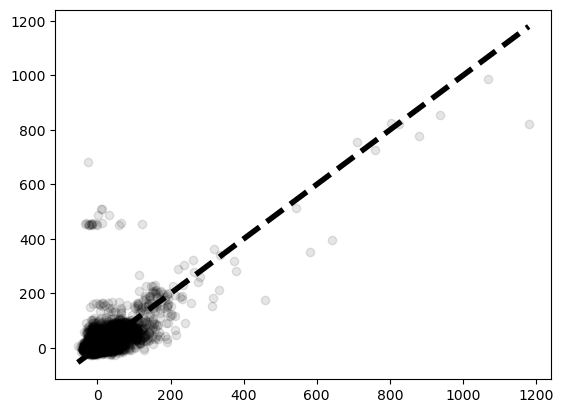

In [13]:
rf = CV_rfc

# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Root Mean Squared Error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

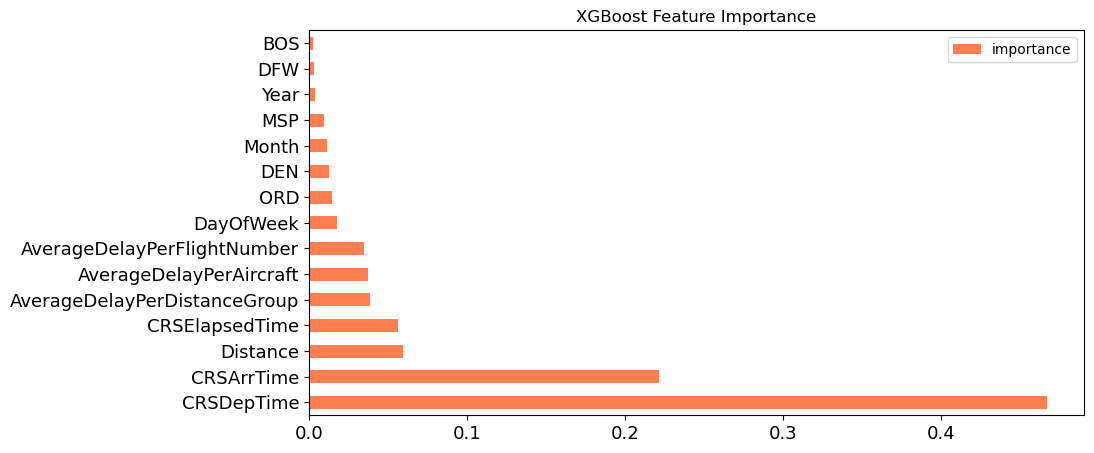

In [14]:
## feature importance
feature_importance = pd.DataFrame(
    rf.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:15]

feature_importance.plot(
    kind="barh",
    figsize=(10, 5),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

# XGBoost

In [15]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=400, random_state=1601)

# Train the model using the training sets
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=1601,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Root Mean squared error: 64.90
Mean absolute error: 24.47
Coefficient of determination: -0.67


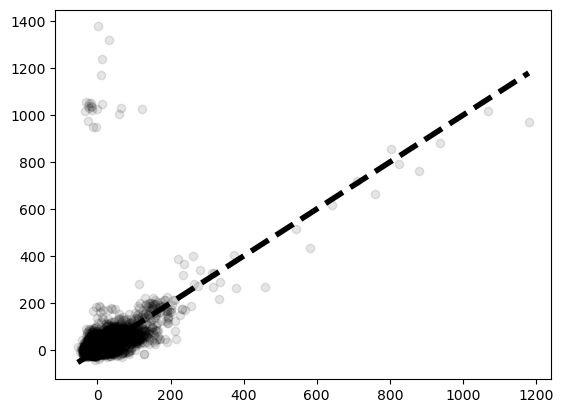

In [18]:
# Make predictions using the testing set
y_pred = xgb.predict(X_test)

# The mean squared error
print("Root Mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))

# The MAE
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# plot the results
plt.scatter(y_test, y_pred, color="black", alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)

<AxesSubplot:title={'center':'XGBoost Feature Importance'}>

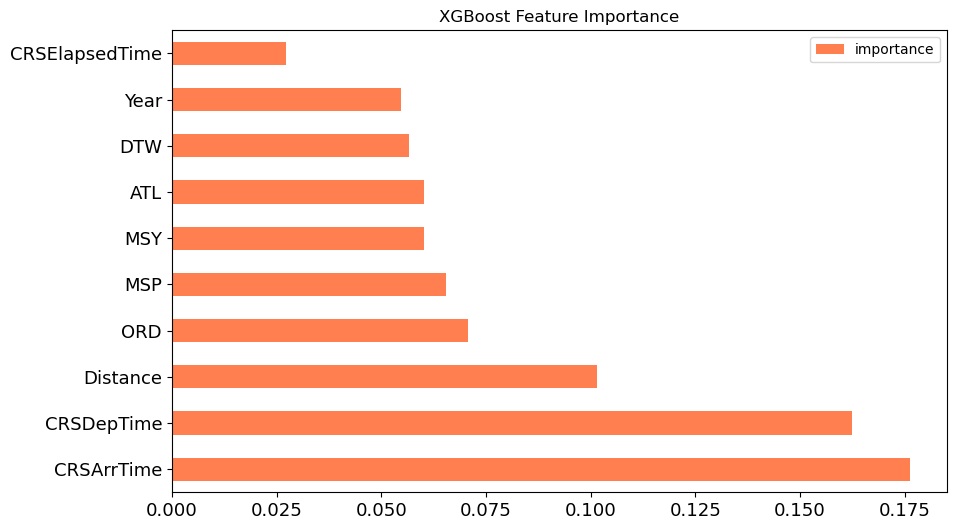

In [11]:
## feature importance
feature_importance = pd.DataFrame(
    xgb.feature_importances_, index=X_train.columns, columns=["importance"]
).sort_values("importance", ascending=False)

# get the 50 most important features
feature_importance = feature_importance.iloc[:10]

feature_importance.plot(
    kind="barh",
    figsize=(10, 6),
    color="coral",
    fontsize=13,
    title="XGBoost Feature Importance",
)

<AxesSubplot:>

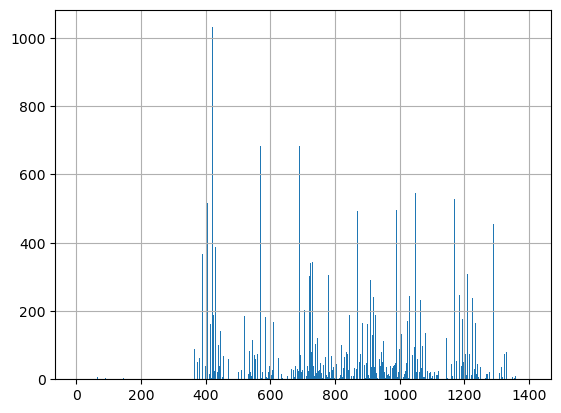

In [12]:
# pplot the CRSArrTime
df["CRSDepTime"].hist(bins=1000)